### Ejercicio final. Marissa Lozano C.


## Questions

   ####  1. Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?
   ####  2. What's the age group with the overall highest number of reported colisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.
   #### 3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?
   #### 4. Why do you think we use the phrase "appear to be" in question 1? What would you need to be able to speak with more confidence about the answer to that question?
   #### 5. What modelling project would you push to develop from the conclusions in this dataset?



In [3]:
## Importar librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Importar la base de datos "data" para su posterior análisis

entrena=pd.read_csv("data.csv")

C:\Users\Marissa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,12,13,16,21,28,32,33,34,35,36,37,40,41,42,43,44,45,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
entrena.head(6)

,Column,Calle,Causa,Ciudad,Cruce,Fecha,Hora,ID,Latitud,Lesionados,...,V2_Uso de Cinturón,V3_Arresto,V3_Dictamen,V3_Edad,V3_Estatus Licencia,V3_Género,V3_No. De Fallecidos,V3_No. De Lesionados,V3_Tipo de Vehículo,V3_Uso de Cinturón
0,0,CAMINO REAL,NO RESPETAR SEÑALAMIENTOS,Monterrey,SANTOS PALOMO,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY1,25.77443,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BERNARDO REYES,Otros,Monterrey,FIDEL VELAZQUEZ,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY10,25.724161,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BERNARDO REYES,Otros,Monterrey,REFORMA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY11,25.685874,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,LINCOLN,INVADIR CARRIL,Monterrey,CUMBRES DEL SOL,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY12,25.797401,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,MADERO,NO GUARDAR DISTANCIA,Monterrey,PABLO A DE LA GARZA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY13,25.682219,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,REVOLUCION,No Respetó Semáforo,Monterrey,PROLONG. ALFONSO REYES,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY14,25.643311,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## En el head me informa que tiene 50 columnas, deseo observar qué columnas son de utilidad, para comenzar a eliminar las que no necesito
list(entrena)


['Column',
 'Calle',
 'Causa',
 'Ciudad',
 'Cruce',
 'Fecha',
 'Hora',
 'ID',
 'Latitud',
 'Lesionados',
 'Longitud',
 'Mes',
 'Muertos',
 'No. De Infracción',
 'Número  total de lesionados',
 'Número total de muertos',
 'Por alcohol',
 'Sentido',
 'Situación climática',
 'Situación del Pavimento',
 'Tipo de incidente',
 'Tipo de involucrado',
 'Tipo de vía',
 'V1_Arresto',
 'V1_Dictamen',
 'V1_Edad',
 'V1_Estatus Licencia',
 'V1_Género',
 'V1_No. De Fallecidos',
 'V1_No. De Lesionados',
 'V1_Tipo de Vehículo',
 'V1_Uso de Cinturón',
 'V2_Arresto',
 'V2_Dictamen',
 'V2_Edad',
 'V2_Estatus Licencia',
 'V2_Género',
 'V2_No. De Fallecidos',
 'V2_No. De Lesionados',
 'V2_Tipo de Vehículo',
 'V2_Uso de Cinturón',
 'V3_Arresto',
 'V3_Dictamen',
 'V3_Edad',
 'V3_Estatus Licencia',
 'V3_Género',
 'V3_No. De Fallecidos',
 'V3_No. De Lesionados',
 'V3_Tipo de Vehículo',
 'V3_Uso de Cinturón']

In [7]:
## Me interesan las columnas iniciales, hasta la información del Vehículo 1.

entrena2=entrena.drop(entrena.columns[[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,]], axis=1)
entrena2.head(10)

,Column,Calle,Causa,Ciudad,Cruce,Fecha,Hora,ID,Latitud,Lesionados,...,Tipo de vía,V1_Arresto,V1_Dictamen,V1_Edad,V1_Estatus Licencia,V1_Género,V1_No. De Fallecidos,V1_No. De Lesionados,V1_Tipo de Vehículo,V1_Uso de Cinturón
0,0,CAMINO REAL,NO RESPETAR SEÑALAMIENTOS,Monterrey,SANTOS PALOMO,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY1,25.77443,No,...,Vía secundaria,NaN,NaN,SD,SIN,M,NaN,NaN,Automóvil,No
1,1,BERNARDO REYES,Otros,Monterrey,FIDEL VELAZQUEZ,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY10,25.724161,No,...,Vía primaria,NaN,NaN,57,SIN,M,NaN,NaN,Automóvil,Sí
2,2,BERNARDO REYES,Otros,Monterrey,REFORMA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY11,25.685874,No,...,Vía primaria,NaN,NaN,34,SIN,M,NaN,NaN,Automóvil,Sí
3,3,LINCOLN,INVADIR CARRIL,Monterrey,CUMBRES DEL SOL,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY12,25.797401,No,...,Vía primaria,NaN,NaN,27,Vigente,M,NaN,NaN,Camión de Carga,No
4,4,MADERO,NO GUARDAR DISTANCIA,Monterrey,PABLO A DE LA GARZA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY13,25.682219,No,...,Vía primaria,NaN,NaN,39,SIN,M,NaN,NaN,Automóvil,Sí
5,5,REVOLUCION,No Respetó Semáforo,Monterrey,PROLONG. ALFONSO REYES,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY14,25.643311,No,...,Vía primaria,NaN,NaN,35,Vigente,M,NaN,NaN,Automóvil,Sí
6,6,ANT CAM A VILLA DE SANTIAGO,NO GUARDAR DISTANCIA,Monterrey,CORREOS MEXICANOS,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY15,25.584966,No,...,Vía secundaria,NaN,NaN,39,Vigente,M,NaN,NaN,Automóvil,No
7,7,CHURUBUSCO,NO GUARDAR DISTANCIA,Monterrey,FRANCISCO BELTRAN,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY16,25.691499,No,...,Vía primaria,NaN,NaN,28,Vigente,M,NaN,NaN,Camión de Carga,No
8,8,LAS FLORES,INVADIR CARRIL,Monterrey,RANGEL FRIAS,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY17,25.730572,No,...,Vía primaria,NaN,NaN,32,Vigente,F,NaN,NaN,Automóvil,No
9,9,COLOSIO,Otros,Monterrey,AVE DEL PALMAR,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY18,25.795179,No,...,Vía secundaria,NaN,NaN,34,Vigente,M,NaN,NaN,Automóvil,No


#### 1. Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?

In [8]:
print("Las calles mas peligrosas son:")
calles=entrena2["Calle"].value_counts()[0:11]
pd.DataFrame(calles)

Las calles mas peligrosas son:


,Calle
MORONES PRIETO,1729
LAZARO CARDENAS,1279
GONZALITOS,1229
GARZA SADA,1215
ALFONSO REYES,1153
JOSE VASCONCELOS,964
LEONES,891
AV. LINCOLN,838
CONSTITUCION,823
FIDEL VELAZQUEZ,752


### 2. What's the age group with the overall highest number of reported colisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.

In [10]:
## Ya que habíamos importado librerías al inicio, este comando puede omitirse
## %matplotlib inline

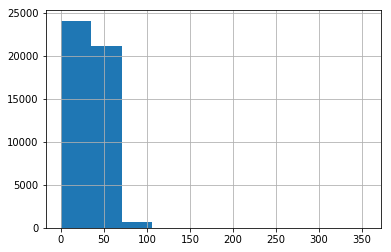

In [13]:
pd.to_numeric(entrena2["V1_Edad"], errors="drop").hist()

### 3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?

In [14]:
entrena2[entrena2["Calle"] == "GARZA SADA"]["V1_Dictamen"].value_counts()

No                                223
Ebrio Completo                      3
Evidente Estado de Alcoholismo      3
Ebrio Incompleto                    1
Name: V1_Dictamen, dtype: int64

#### 4. Why do you think we use the phrase "appear to be" in question 1? What would you need to be able to speak with more confidence about the answer to that

In [16]:
### Vamos a obtener los registros de colisión por ciudades.
entrena2["Ciudad"].value_counts()

Monterrey         20961
San Pedro          8242
San Nicolás        6953
Apodaca            4269
García             4046
Guadalupe          3893
Santa Catarina     3595
Escobedo           3049
                      1
Name: Ciudad, dtype: int64

### Con esto concluyo que efectivamente, todas las calles "Más peligrosas" están en la Cd. de Monterrey.

### 5. What modelling project would you push to develop from the conclusions in this dataset?